# Regression

## Simple Linear Regression

Simple Linear Regression is a method to help us understand the relationship between two variables:

- The predictor/independent variable (X)
- The response/dependent variable (that we want to predict)(Y)

The result of Linear Regression is a **linear function** that predicts the response (dependent) variable as a function of the predictor (independent) variable.

$$
Y: Response \ Variable\\
X: Predictor \ Variables
$$

**Linear function:**

$$
\hat{y} = a + b  X
$$

- a refers to the **intercept** of the regression line 0, in other words: the value of Y when X is 0.
- b refers to the **slope** of the regression line, in other words: the value with which Y changes when X increases by 1 unit.

### Ordinary Least Squares

In order to understand which slope and intercept is the best fit for our model we use the Ordinary Least Squares method. This method tries to minimize the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) by trying to fit the regression line as close as possible to the data points.

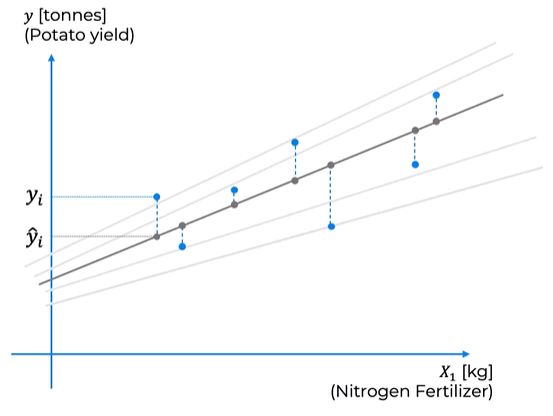

In mathematical terms, we minimize the sum of squared errors (SSE) or mean squared error (MSE) to obtain the best parameters:

$$
SSE = \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$


Pasamos ahora a la parte práctica, para ello vamos a utilizar un dataset de salarios, donde tenemos el salario de una persona en función de los años de experiencia que tiene. Vamos a ver como se comporta la regresión lineal en este caso.

In [8]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
# Importing the dataset
df = pd.read_csv('C:\Repos Personales\MachineLearningAz\Codes and Datasets\Part 2 - Regression\Section 4 - Simple Linear Regression\Python\Salary_Data.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [7]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [9]:
# Training the Simple Linear Regression model on the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


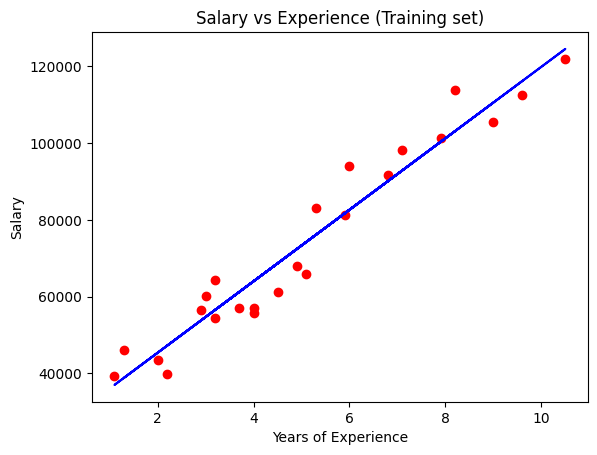

In [12]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color= 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

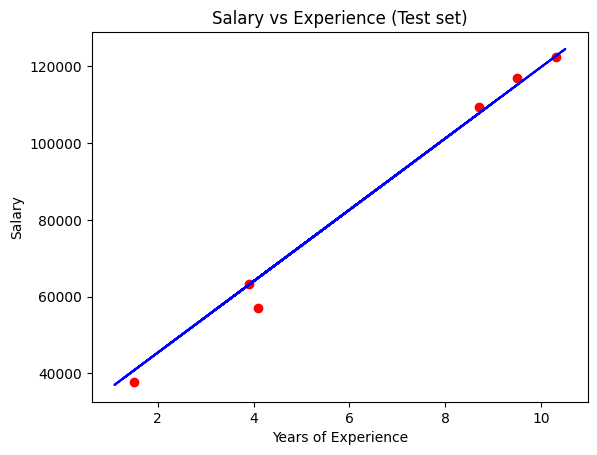

In [13]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color= 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [14]:
# Predicting a single observation
print(regressor.predict([[12]]))

[138531.00067138]


The number of years of experience is our predictor variable and the salary is our target variable. Here, we see that the 12 is given as a 2D array. This is due to the predict function that always expects a 2D array.

In [15]:
# Getting the final linear regression equation with the values of the coefficients
print(regressor.coef_)
print(regressor.intercept_)

[9312.57512673]
26780.09915062818


Then, we can simply put those values into the linear regression formula as follows:

$$
\hat{y} = a + b  X
$$

$$
\hat{y} = 26780.1 + 9312.57  X
$$

## Multiple Linear Regression

Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables.

Most of the real-world regression models involve multiple predictors. We can imagine that the price of a house will depend on multiple factors. Let's say, the price of a house will depend on variables like the location of the house, area of the house, number of bedrooms, how old is the house, etc. Here, we can consider the price of a house as a dependent variable and the remaining as independent variables.

The linear equation will be:

$$
\hat{y} = a + b_1 X_1 + b_2 X_2 + ... + b_n X_n
$$

Where $a$ is the intercept, $b_1, b_2, ..., b_n$ are the coefficients for the different features $X_1, X_2, ..., X_n$.

You will always have the same number of coefficients as you have features.

### Assumptions of Linear Regression

Before we start applying Linear Regression models in Python, it is important to understand the assumptions that we make while using Linear Regression models. There are six assumptions associated with a Linear Regression model:

1. Linearity: The relationship between X and the mean of Y is linear.
2. Homoscedasticity: The variance of residual is the same for any value of X.
3. Multivariate normality: For any fixed value of X, Y is normally distributed.
4. Independence of errors: Observations are independent of each other. There are no patterns in the residuals.
5. Lack of multicollinearity: Features are independent of each other. They should not be strongly correlated.
6. Outliers: There should be no outliers in the data. As outliers can have a big influence on the estimated coefficients.

Assuming a dataframe where the dependant variable is the profit a company has, while the independant variables are the R&D spend, the administration spend, the marketing spend and the state where the company is located, we can see that the state is a categorical variable, so we need to encode it. After encoded, we will have n columns, one for each state, and the value will be 1 if the company is located in that state, and 0 if not. This is called **dummy variables**.

Given a case where we have 2 different states, meaning that we have two different dummy columns, the formula for the multiple linear regression will be:

$$
\hat{y} = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

Where $a$ is the intercept, $b_1, b_2, b_3, b_4$ are the coefficients for the different features $X_1, X_2, X_3, X_4$. In this example, $X_1$ will be the R&D spend, $X_2$ the administration spend, $X_3$ the marketing spend and $X_4$ the state.

We can see that we omit one of the dummy variables, because if we have 2 states, we only need one dummy variable, because if the company is not in the first state, it will be in the second state, so we don't need to have both columns.

Whenever you are building a model, you should omit one dummy variable to avoid a problem where the model will be unable to distinguish between the dummy variables. This is often called the **dummy variable trap**.

### Understanding the P-value

